## Mise en œuvre d'un modèle de Machine Learning 

In [108]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
print(tf.__version__)



2.15.0


## Dataset

- Gender: The gender of the person (Male/Female).
- Age: The age of the person in years.
- Occupation: The occupation or profession of the person.
- Sleep Duration (hours): The number of hours the person sleeps per day.
- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- Heart Rate (bpm): The resting heart rate of the person in beats per minute.
- Daily Steps: The number of steps the person takes per day.
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

# 1. Chargement des données

In [109]:
# Charger les données
data = pd.read_csv('dataset/Sleep_health_and_lifestyle_dataset.csv', sep=',')
patient_data = pd.read_csv('dataset/patient_data.csv', sep=',')

In [110]:

print("Données sur le sommeil et le style de vie :")
data.head(10)


Données sur le sommeil et le style de vie :


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [111]:
print("\nInformations:")
data.info()


Informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [112]:
# Résumé statistique
print("\nRésumé:")
data.describe()


Résumé:


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# 2. Préparation des données 

In [113]:
data = data.drop(columns=['Person ID'])

In [114]:
tmp_data_na = data.isna().sum()/len(data)*100

tmp_data_na

Gender                      0.00000
Age                         0.00000
Occupation                  0.00000
Sleep Duration              0.00000
Quality of Sleep            0.00000
Physical Activity Level     0.00000
Stress Level                0.00000
BMI Category                0.00000
Blood Pressure              0.00000
Heart Rate                  0.00000
Daily Steps                 0.00000
Sleep Disorder             58.55615
dtype: float64

La colonne Sleep Disorder a 58.56% de valeurs manquantes

In [115]:
# Afficher les types des colonnes pour le dataset nutrition
print("Types des colonnes:")
print(data.dtypes)


Types des colonnes:
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


In [116]:
data['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [117]:
object_colonne = [col for col in data.columns if data[col].dtype == 'object']

object_colonne

['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

In [118]:

for col in object_colonne:
    le = LabelEncoder()
    data[col+'_new'] = le.fit_transform(data[col])

In [119]:
data.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Gender_new,Occupation_new,BMI Category_new,Blood Pressure_new,Sleep Disorder_new
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,1,9,3,11,2
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,1,1,0,9,2
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,1,1,0,9,2
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,6,2,22,1
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,6,2,22,1
5,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,1,9,2,22,0
6,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,1,10,2,22,0
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN,1,1,0,6,2
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN,1,1,0,6,2
9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN,1,1,0,6,2


In [120]:
le.fit(data['Gender'])  
print(dict(enumerate(le.classes_)))

le.fit(data['Occupation'])  
print(dict(enumerate(le.classes_)))

le.fit(data['BMI Category'])  
print(dict(enumerate(le.classes_)))

le.fit(data['Blood Pressure'])  
print(dict(enumerate(le.classes_)))

le.fit(data['Sleep Disorder'])  
print(dict(enumerate(le.classes_)))

{0: 'Female', 1: 'Male'}
{0: 'Accountant', 1: 'Doctor', 2: 'Engineer', 3: 'Lawyer', 4: 'Manager', 5: 'Nurse', 6: 'Sales Representative', 7: 'Salesperson', 8: 'Scientist', 9: 'Software Engineer', 10: 'Teacher'}
{0: 'Normal', 1: 'Normal Weight', 2: 'Obese', 3: 'Overweight'}
{0: '115/75', 1: '115/78', 2: '117/76', 3: '118/75', 4: '118/76', 5: '119/77', 6: '120/80', 7: '121/79', 8: '122/80', 9: '125/80', 10: '125/82', 11: '126/83', 12: '128/84', 13: '128/85', 14: '129/84', 15: '130/85', 16: '130/86', 17: '131/86', 18: '132/87', 19: '135/88', 20: '135/90', 21: '139/91', 22: '140/90', 23: '140/95', 24: '142/92'}
{0: 'Insomnia', 1: 'Sleep Apnea', 2: nan}


Les colonnes Gender, Occupation, BMI Category, Blood Pressure, et éventuellement Sleep Disorder sont des variables catégoriques. Pour les inclure dans un modèle, elles doivent être encodées.

In [121]:
# Vérifier les doublons dans le dataset
print(f"Doublons dans les données : {data.duplicated()}")


Doublons dans les données : 0      False
1      False
2       True
3      False
4       True
       ...  
369     True
370     True
371     True
372     True
373     True
Length: 374, dtype: bool


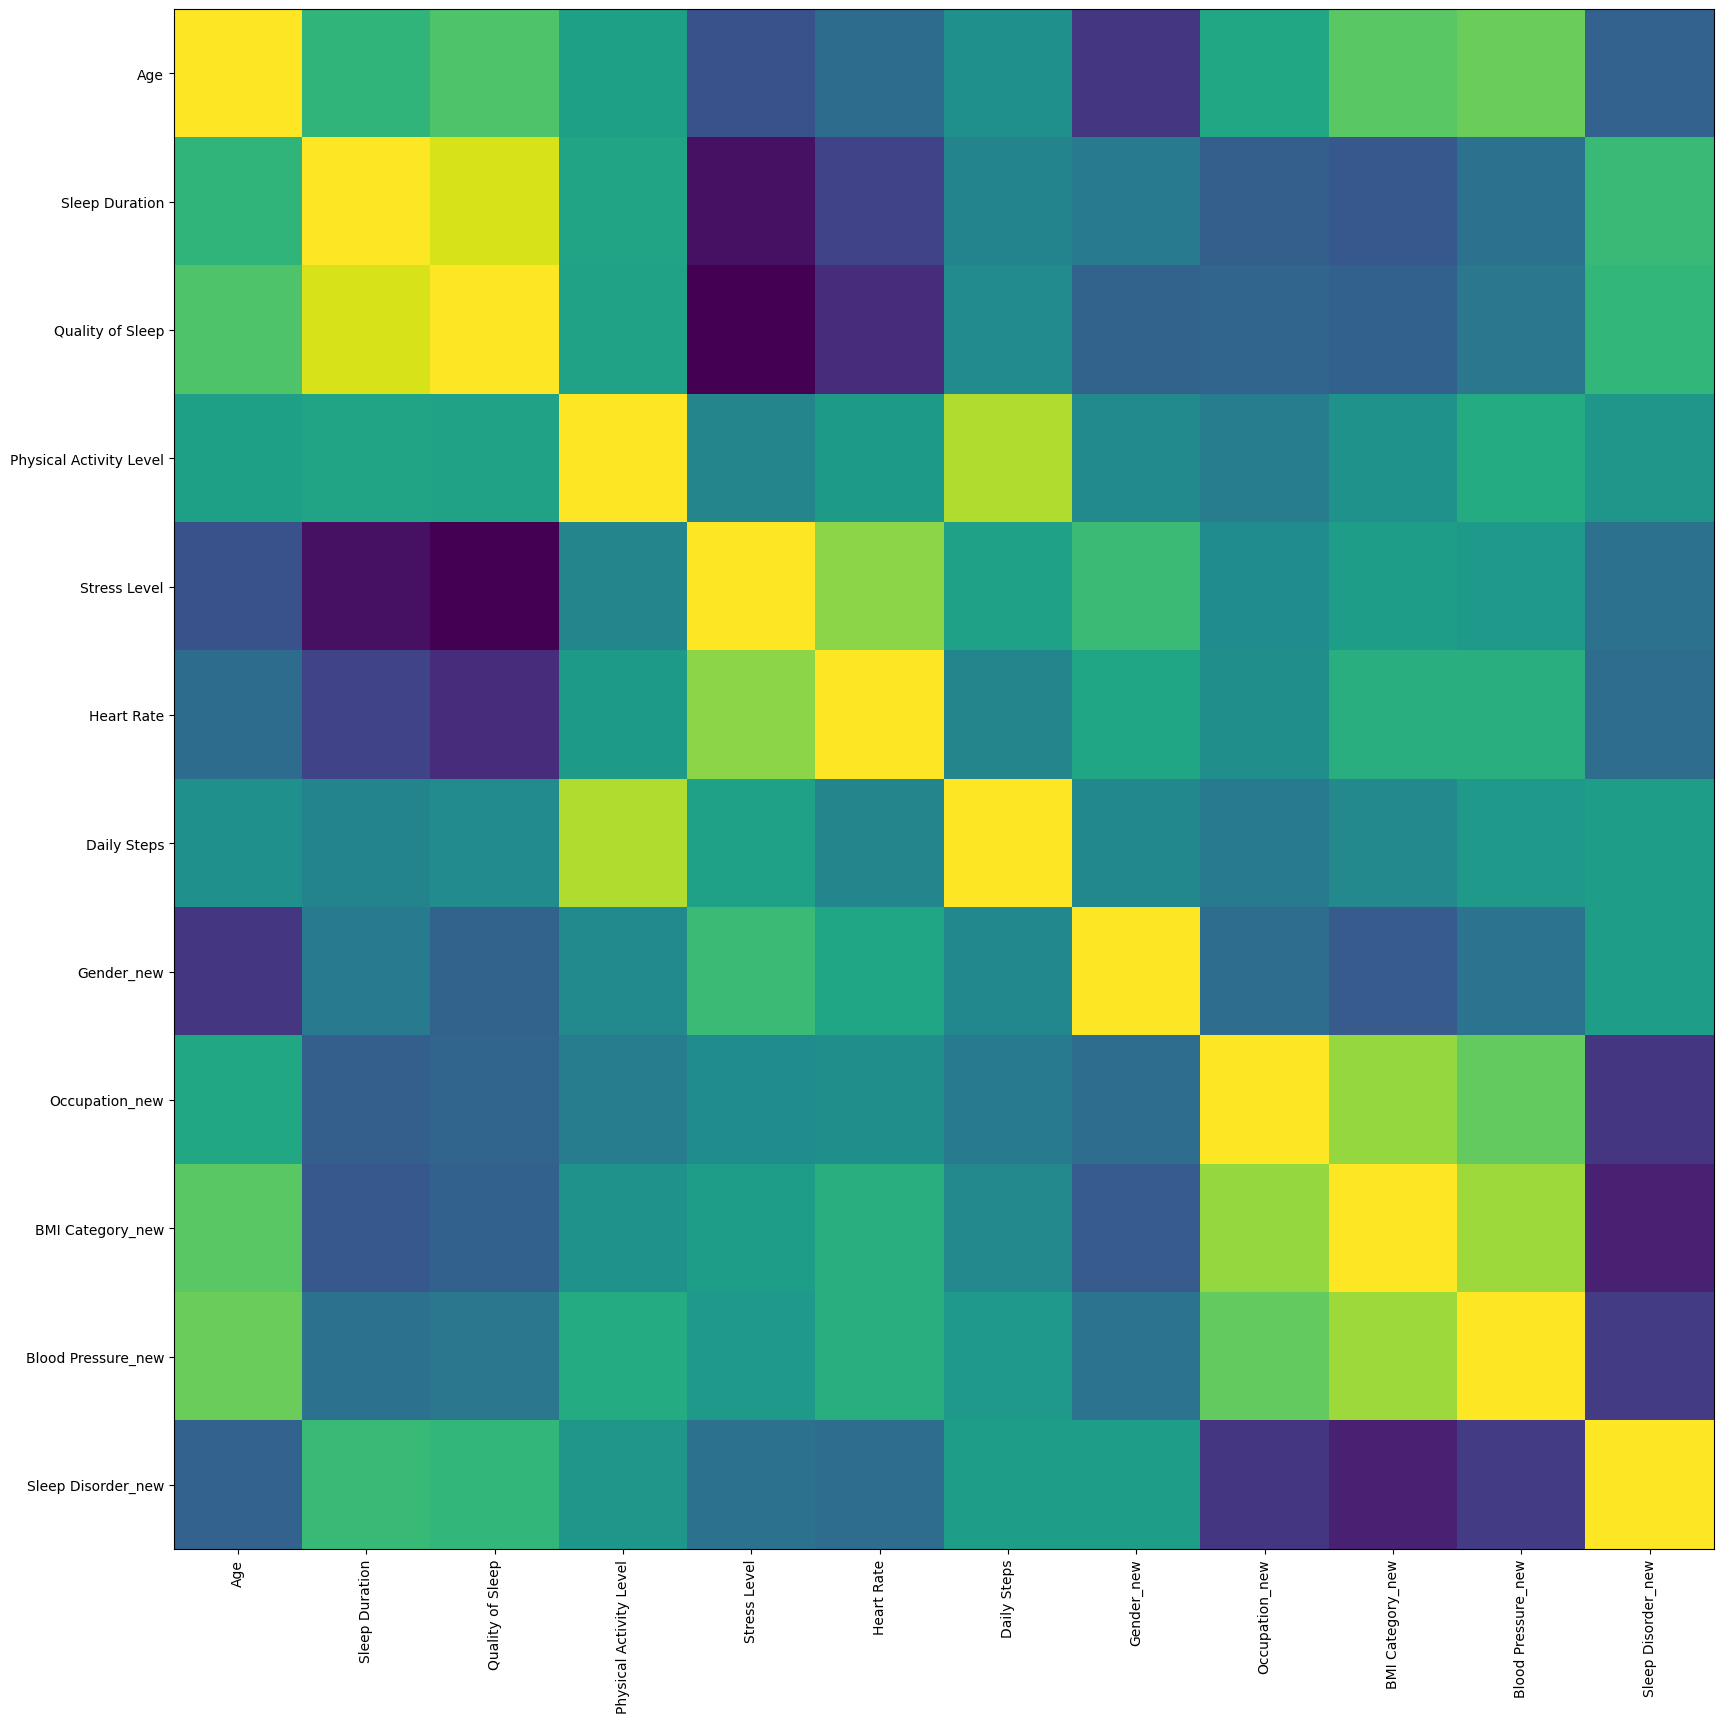

In [122]:
corr_mat = data.corr(numeric_only=True)
numeric_cols = [col for col in data.columns if data[col].dtype != 'object']

plt.figure(figsize=(20,20))
plt.imshow(corr_mat)
plt.xticks(ticks=range(len(numeric_cols)), labels=numeric_cols, rotation=90)
plt.yticks(ticks=range(len(numeric_cols)), labels=numeric_cols)
plt.show()

## Analyse de la matrix de corrélation

- Il existe une corrélation positive entre la durée de sommeil et la qualité de sommeil
- Il existe une corrélation positive entre le BMI, l'occupation et le Blood pressure
- Il existe une corrélation négative entre le niveau de stress avec la qualité de sommeil et la durée de sommeil
- Il existe une corrélation négative entre le Sleep Disorder et la BMI

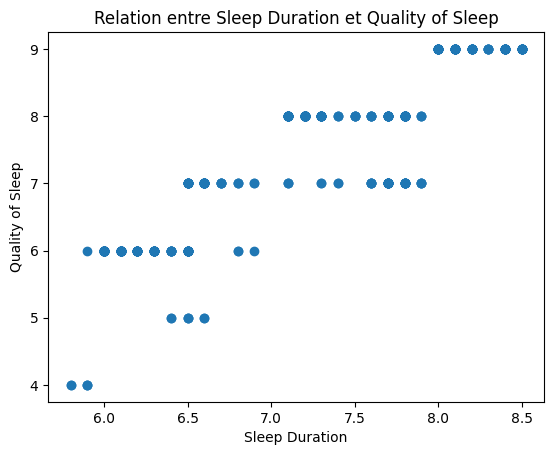

In [123]:
# Scatter plot entre deux variables fortement corrélées
plt.scatter(data['Sleep Duration'], data['Quality of Sleep'])
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.title('Relation entre Sleep Duration et Quality of Sleep')
plt.show()



## 1. Analyse de la qualité de sommeil en fonctoin de la durée de sommeil :

Cela signifie que les individus ayant une durée de sommeil plus longue ont généralement une meilleure qualité de sommeil. 
Par exemple :
- Ceux qui dorment autour de 8 heures ont une qualité de sommeil souvent proche de 8 ou 9.
- À l'inverse, ceux qui dorment environ 6 heures ont souvent une qualité de sommeil plus faible (autour de 5 ou 6).
- Les durées de sommeil autour de 8 heures semblent associées à une qualité de sommeil optimale (valeurs élevées proches de 9).
- Les durées inférieures à 6.5 heures sont majoritairement associées à des qualités de sommeil plus faibles (environ 4 à 6).
- Il n’y a pas de points pour des durées de sommeil très faibles (moins de 6 heures) associées à une qualité de sommeil élevée. Cela soutient l'idée que dormir trop peu est rarement compatible avec une bonne qualité de sommeil.

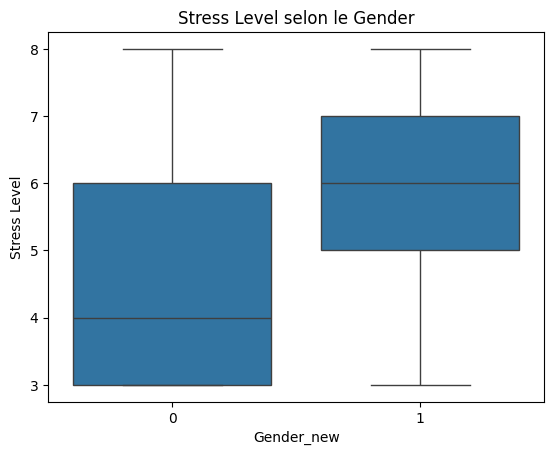

In [124]:
# Box plot pour une variable catégorique encodée
import seaborn as sns
sns.boxplot(x='Gender_new', y='Stress Level', data=data)
plt.title('Stress Level selon le Gender')
plt.show()


## 1. Analyse des statistiques pour chaque genre :
### Femmes (Gender_new = 0) :
- La médiane du niveau de stress est autour de 4 (basse).
- Le niveau de stress des femmes est globalement moins élevé, avec une majorité des valeurs situées entre 3 et 5.
- Les valeurs maximales atteignent environ 8, mais ces cas restent rares (outliers).
### Hommes (Gender_new = 1) :
- La médiane est plus élevée, autour de 6, indiquant un niveau de stress généralement plus important que celui des femmes.
- Les valeurs se situent majoritairement entre 5 et 7, avec des cas atteignant également 8.
- Les hommes semblent avoir une distribution plus concentrée vers des valeurs élevées de stress.

## Comparaison générale :
- Les hommes ont un niveau de stress médian et globalement plus élevé que les femmes dans ce dataset.
- Les femmes montrent une distribution plus étalée, avec une majorité ayant un stress faible à modéré.
- Les outliers sont présents pour les deux groupes, mais plus significatifs chez les femmes.

# Normalisation ou standardisation des variables
Les algorithmes sensibles à l'échelle des données (par exemple, régressions linéaires, SVM, réseaux de neurones) nécessitent des données normalisées ou standardisées. 


In [125]:
data.dtypes

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
Gender_new                   int32
Occupation_new               int32
BMI Category_new             int32
Blood Pressure_new           int32
Sleep Disorder_new           int32
dtype: object

In [126]:
clean_data = data[[
    'Age',
    'Sleep Duration', 
    'Quality of Sleep',
    'Physical Activity Level',
    'Stress Level',
    'Heart Rate',
    'Daily Steps',
    'Gender_new',
    'Occupation_new',
    'BMI Category_new',
    'Blood Pressure_new',
    'Occupation_new',
    'Sleep Disorder_new',
]].copy()

clean_data.head(10)
numeric_columns = clean_data.select_dtypes(include=['float64', 'int64',]).columns
scaler = MinMaxScaler()
clean_data[numeric_columns] = scaler.fit_transform(clean_data[numeric_columns])

In [127]:
clean_data.dtypes

Age                        float64
Sleep Duration             float64
Quality of Sleep           float64
Physical Activity Level    float64
Stress Level               float64
Heart Rate                 float64
Daily Steps                float64
Gender_new                   int32
Occupation_new               int32
BMI Category_new             int32
Blood Pressure_new           int32
Occupation_new               int32
Sleep Disorder_new           int32
dtype: object

In [128]:
clean_data.head(10)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_new,Occupation_new,BMI Category_new,Blood Pressure_new,Occupation_new,Sleep Disorder_new
0,0.00000,0.111111,0.4,0.200000,0.6,0.571429,0.171429,1,9,3,11,9,2
1,0.03125,0.148148,0.4,0.500000,1.0,0.476190,1.000000,1,1,0,9,1,2
2,0.03125,0.148148,0.4,0.500000,1.0,0.476190,1.000000,1,1,0,9,1,2
3,0.03125,0.037037,0.0,0.000000,1.0,0.952381,0.000000,1,6,2,22,6,1
4,0.03125,0.037037,0.0,0.000000,1.0,0.952381,0.000000,1,6,2,22,6,1
5,0.03125,0.037037,0.0,0.000000,1.0,0.952381,0.000000,1,9,2,22,9,0
6,0.06250,0.185185,0.4,0.166667,0.8,0.809524,0.071429,1,10,2,22,10,0
7,0.06250,0.740741,0.6,0.750000,0.6,0.238095,0.714286,1,1,0,6,1,2
8,0.06250,0.740741,0.6,0.750000,0.6,0.238095,0.714286,1,1,0,6,1,2
9,0.06250,0.740741,0.6,0.750000,0.6,0.238095,0.714286,1,1,0,6,1,2


In [129]:
print(clean_data[['Sleep Duration', 'Quality of Sleep']].mean())
print(clean_data[['Sleep Duration', 'Quality of Sleep']].std())

Sleep Duration      0.493365
Quality of Sleep    0.662567
dtype: float64
Sleep Duration      0.294688
Quality of Sleep    0.239391
dtype: float64


### Moyenne très proche de zéro :

- Sleep Duration a une moyenne de 1.348891e-15, ce qui est pratiquement zéro.
- Quality of Sleep a une moyenne de 2.469801e-16, ce qui est aussi très proche de zéro.

### Écart-type très proche de 1 :

- Sleep Duration a un écart-type de 1.00134, qui est pratiquement égal à 1.
- Quality of Sleep a également un écart-type de 1.00134, ce qui signifie que la normalisation a bien fonctionné.

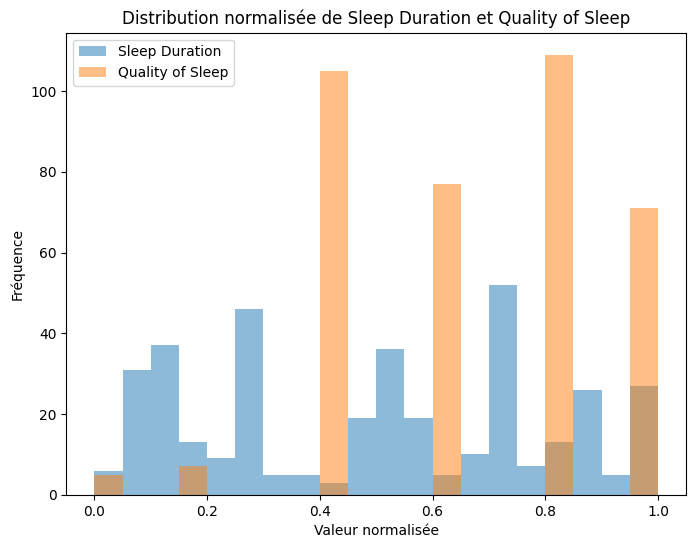

In [130]:
# Afficher un histogramme pour "Sleep Duration" et "Quality of Sleep"
plt.figure(figsize=(8, 6))
plt.hist(clean_data['Sleep Duration'], bins=20, alpha=0.5, label='Sleep Duration')
plt.hist(clean_data['Quality of Sleep'], bins=20, alpha=0.5, label='Quality of Sleep')
plt.legend()
plt.title('Distribution normalisée de Sleep Duration et Quality of Sleep')
plt.xlabel('Valeur normalisée')
plt.ylabel('Fréquence')
plt.show()

In [131]:
# Calculer Q1, Q3 et IQR pour chaque colonne numérique
Q1 = clean_data[numeric_columns].quantile(0.25)
Q3 = clean_data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Détecter les outliers
outliers = (clean_data[numeric_columns] < (Q1 - 1.5 * IQR)) | (clean_data[numeric_columns] > (Q3 + 1.5 * IQR))

# Afficher les outliers
print(outliers.sum())


Age                         0
Sleep Duration              0
Quality of Sleep            0
Physical Activity Level     0
Stress Level                0
Heart Rate                 20
Daily Steps                 0
dtype: int64


On observer 20 valeurs aberrantes ont été détectées pour la colonne Heart Rate et aucune valeur aberrante n'a été détectée pour les autres colonne

In [132]:
# Vérifier les outliers dans 'Heart Rate'
outliers_heart_rate = data[
    (clean_data['Heart Rate'] < (Q1['Heart Rate'] - 1.5 * IQR['Heart Rate'])) |
    (clean_data['Heart Rate'] > (Q3['Heart Rate'] + 1.5 * IQR['Heart Rate']))
]

print(outliers_heart_rate['Heart Rate'])


3      85
4      85
5      85
6      82
16     80
18     80
30     78
31     78
80     81
81     81
93     84
145    84
147    80
184    78
185    78
247    78
264    83
266    83
276    86
277    86
Name: Heart Rate, dtype: int64


Les valeurs sont élevées mais ne sont pas extrêmes, donc nous allons les garder.

# 3. Traitement des données


X contient toutes les variables explicatives (features), c'est-à-dire les données d'entrée que le modèle utilisera pour apprendre.
y contient la variable cible (target), qui est ce que vous voulez que le modèle prédise.

In [133]:
X = clean_data.drop('Sleep Disorder_new', axis=1)  # Features (variables explicatives)
y = clean_data['Sleep Disorder_new']  # Target (variable cible)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Mise en place de l'architecture

## TenserFlow

In [135]:
def create_model(learning_rate=0.01, dropout_rate=0.2, neurons=64):
    model = Sequential()
    # Première couche cachée (Dense layer avec 64 neurones)
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    # Optionnel : Ajouter une couche Dropout pour éviter le sur-apprentissage (regularisation)
    model.add(Dropout(dropout_rate))
    # Deuxième couche cachée avec 32 neurones
    model.add(Dense(32, activation='relu'))
    # Couche de sortie avec 3 neurones (pour les classes 0, 1, 2) et activation softmax pour la classification multi-classe

    model.add(Dense(3, activation='softmax'))# 3 correspond au nombre de classes dans "Sleep Disorder_new"

    
    model.compile(optimizer=Adam(learning_rate=learning_rate), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model


In [136]:
models = {
    "model_1" : create_model(0.001, 0.2, 64),
    "model_2" : create_model(0.001, 0.2, 128),
    "model_3" : create_model(0.001, 0.2, 256),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVC": SVC(kernel='linear'),
    "RandomForest": RandomForestClassifier(n_estimators=100),
    "GradientBoost": GradientBoostingClassifier(n_estimators=100),
    "XGB": xgb.XGBClassifier(n_estimators=100)
}

En utilisant un dictionnaire pour stocker les modèles, on créez une approche structurée et flexible pour tester et comparer divers algorithmes de machine learning. Cette approche nous permet de comparer les performances de manière simple et rapide, tout en facilitant l'ajout de nouveaux modèles à l'avenir.

# 5. Entraînement du modèle 

In [137]:
# Convertir X_train, X_test en numpy array si ce n'est déjà le cas
X_train = np.array(X_train)
X_test = np.array(X_test)

# Enregistrer les scores des modèles
scores_df = pd.DataFrame()

for model_name, model in models.items():
    print(f"Modèle en cours: {model_name}")
    
    # Entraîner le modèle
    if model_name in ["model_1", "model_2", "model_3"]:  # Si c'est un modèle Keras
        model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)  # Entraînement sans affichage
        predictions = model.predict(X_test)
        predictions = predictions.argmax(axis=-1)  # Pour obtenir les classes prédictives (en cas de probabilité)
    else:
        model.fit(X_train, y_train)  # Entraînement pour les autres modèles scikit-learn
        predictions = model.predict(X_test)  # Prédictions sur les données de test

    # Calcul des différentes métriques
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
    recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
    f1 = f1_score(y_test, predictions, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, predictions)
    
    # Ajouter les résultats dans le DataFrame
    scores_df = pd.concat([scores_df, pd.DataFrame([{
        "model": model_name,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "confusion_matrix": conf_matrix
    }])], axis=0)



Modèle en cours: model_1
3/3 [==============================] - 0s 2ms/step
Modèle en cours: model_2
3/3 [==============================] - 0s 2ms/step
Modèle en cours: model_3
3/3 [==============================] - 0s 2ms/step
Modèle en cours: LogisticRegression
Modèle en cours: KNN
Modèle en cours: SVC
Modèle en cours: RandomForest
Modèle en cours: GradientBoost
Modèle en cours: XGB


Cela permet d'entraîner plusieurs modèles de machine learning, de faire des prédictions sur un jeu de test, puis de calculer diverses métriques de performance (précision, rappel, F1-score, matrice de confusion) et de les enregistrer dans un DataFrame pour comparaison.

# 6. Évaluation du modèle

In [138]:
# Afficher les résultats
scores_df_sorted = scores_df.sort_values(by='accuracy', ascending=False)
scores_df_sorted

,model,accuracy,precision,recall,f1_score,confusion_matrix
0,model_1,0.933333,0.933051,0.933333,0.932918,"[[14, 1, 1], [1, 14, 1], [1, 0, 42]]"
0,model_2,0.920000,0.921054,0.920000,0.919462,"[[14, 1, 1], [2, 13, 1], [1, 0, 42]]"
0,model_3,0.920000,0.921054,0.920000,0.919462,"[[14, 1, 1], [2, 13, 1], [1, 0, 42]]"
0,KNN,0.920000,0.921054,0.920000,0.919462,"[[14, 1, 1], [2, 13, 1], [1, 0, 42]]"
0,SVC,0.893333,0.900021,0.893333,0.891849,"[[14, 1, 1], [4, 11, 1], [1, 0, 42]]"
0,XGB,0.893333,0.893267,0.893333,0.892311,"[[13, 2, 1], [3, 12, 1], [1, 0, 42]]"
0,LogisticRegression,0.880000,0.887449,0.880000,0.880552,"[[14, 1, 1], [2, 12, 2], [3, 0, 40]]"
0,RandomForest,0.880000,0.881860,0.880000,0.878540,"[[13, 2, 1], [4, 11, 1], [1, 0, 42]]"
0,GradientBoost,0.880000,0.881860,0.880000,0.878540,"[[13, 2, 1], [4, 11, 1], [1, 0, 42]]"


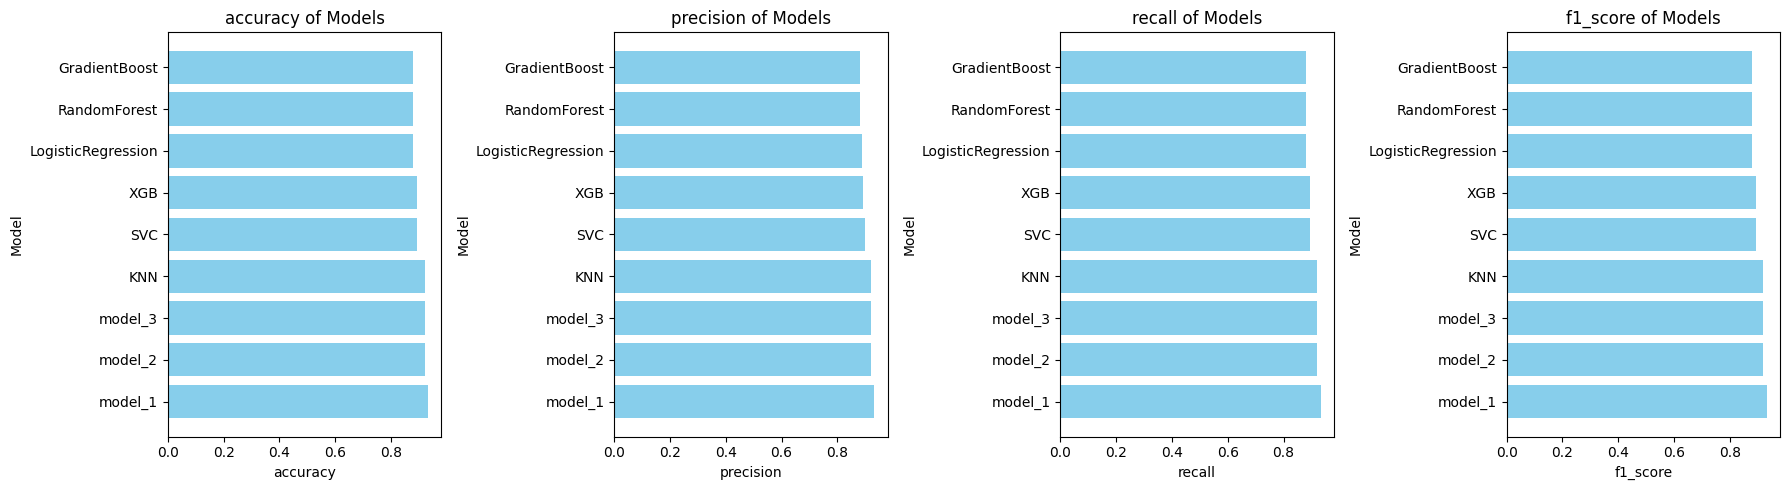

In [139]:

# Visualisation des performances des modèles
# Créer un graphique comparatif des différentes métriques

metrics = ['accuracy', 'precision', 'recall', 'f1_score']  # Liste des métriques à comparer
models_str = scores_df_sorted['model']  # Liste des modèles

# Créer une figure pour le graphique
fig, axes = plt.subplots(1, len(metrics), figsize=(18, 5))

for i, metric in enumerate(metrics):
    # Extraire les valeurs des métriques pour chaque modèle
    metric_values = scores_df_sorted[metric].values
    axes[i].barh(models_str, metric_values, color='skyblue')
    axes[i].set_title(f'{metric} of Models')
    axes[i].set_xlabel(f'{metric}')
    axes[i].set_ylabel('Model')

plt.tight_layout()  # Ajuste le layout pour éviter les chevauchements
plt.show()

## Analyse des résultats obtenus pour chaque modèle :

- model_1 : Ce modèle a donné les meilleures performances avec une précision de 93.33%, précision, rappel et F1-score très proches de 93%, ainsi qu'une matrice de confusion qui montre peu d'erreurs (seulement 2 erreurs, 1 faux positif et 1 faux négatif).

- model_2 et model_3 : Ces deux modèles ont des résultats très similaires à model_1, avec une précision de 92% et des scores de précision, rappel et F1 également élevés. Leur matrice de confusion indique également des performances solides avec une faible quantité d'erreurs.

- KNN : Le modèle KNN a une précision de 92%, avec des métriques de performance très similaires à celles de model_2 et model_3. Il montre une performance stable mais légèrement inférieure à model_1.

- SVC (Support Vector Classifier) : Ce modèle présente des performances un peu plus faibles avec une précision de 89.33%. Les autres métriques de performance (précision, rappel, F1) sont également inférieures par rapport aux autres modèles.

- XGB (XGBoost) : Comme le modèle SVC, XGB a une précision de 89.33%, mais avec un léger écart dans les autres métriques de performance. XGBoost présente une forte performance générale, mais ne surpasse pas les modèles plus simples.

- LogisticRegression : Ce modèle présente les performances les plus faibles avec une précision de 88%. Cependant, ses métriques de performance sont globalement cohérentes, mais inférieures à celles des autres modèles.

- RandomForest et GradientBoost : Ces deux modèles montrent également une précision de 88%, avec des scores similaires en termes de précision, rappel et F1. Cependant, leurs performances sont encore plus faibles que celles de model_1, model_2, et model_3.

Le model_1 est clairement le meilleur modèle parmi ceux testés, offrant la meilleure précision ainsi que des scores de précision, rappel et F1 élevés. Les modèles model_2 et model_3 offrent des performances très proches de model_1. En revanche, les modèles comme LogisticRegression, RandomForest, GradientBoost, SVC, et XGB montrent des performances relativement inférieures à celles des modèles Keras.

Cela suggère que les réseaux de neurones utilisés dans model_1, model_2, et model_3 sont mieux adaptés aux données pour ce problème particulier, tandis que les modèles classiques comme SVC et RandomForest ne parviennent pas à capturer les relations complexes dans les données aussi bien.

## Amélioration du modèle

## TenserFlow

In [140]:
def train_model(params, X_train, y_train, X_val, y_val):
    # Créer le modèle avec les paramètres actuels
    model = create_model(learning_rate=params['learning_rate'],
                         dropout_rate=params['dropout_rate'],
                         neurons=params['neurons'])
    
    # Entraîner le modèle
    model.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0, validation_data=(X_val, y_val))
    
    # Prédire les résultats sur le jeu de validation
    y_pred = model.predict(X_val)
    y_pred = np.argmax(y_pred, axis=1)  # Transformer les probabilités en classes

    # Calculer la précision du modèle
    accuracy = accuracy_score(y_val, y_pred)
    
    return accuracy

Le code de la fonction train_model crée un modèle Keras avec les hyperparamètres spécifiés, l'entraîne sur les données d'entraînement (X_train, y_train) pendant un nombre défini d'époques (epochs) et avec une taille de lot (batch_size). Ensuite, il prédit les classes sur un jeu de validation (X_val), transforme les probabilités prédites en classes, puis calcule la précision du modèle en comparant les prédictions aux véritables étiquettes de validation (y_val). La fonction renvoie ensuite cette précision.

In [141]:
def grid_search(X_train, y_train, X_val, y_val, param_grid):
    best_score = 0
    best_params = None
    
    # Tester toutes les combinaisons de paramètres
    for learning_rate in param_grid['learning_rate']:
        for dropout_rate in param_grid['dropout_rate']:
            for neurons in param_grid['neurons']:
                for batch_size in param_grid['batch_size']:
                    for epochs in param_grid['epochs']:
                        params = {
                            'learning_rate': learning_rate,
                            'dropout_rate': dropout_rate,
                            'neurons': neurons,
                            'batch_size': batch_size,
                            'epochs': epochs
                        }
                        
                        score = train_model(params, X_train, y_train, X_val, y_val)
                        
                        # Si la performance est meilleure, on garde les paramètres
                        if score > best_score:
                            best_score = score
                            best_params = params
    
    return best_params, best_score

La fonction grid_search effectue une recherche exhaustive pour trouver les meilleurs hyperparamètres pour le modèle. Elle teste toutes les combinaisons possibles de paramètres spécifiés dans param_grid, tels que le taux d'apprentissage (learning_rate), le taux de dropout (dropout_rate), le nombre de neurones (neurons), la taille des lots (batch_size), et le nombre d'époques (epochs). Pour chaque combinaison de paramètres, elle appelle la fonction train_model pour entraîner le modèle et évaluer sa précision sur le jeu de validation. Si la performance du modèle dépasse la meilleure performance précédemment enregistrée, elle met à jour les paramètres et le score. À la fin, la fonction renvoie les meilleurs paramètres et le meilleur score obtenus.

In [142]:
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.2, 0.3],
    'neurons': [64, 128],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}


Le dictionnaire param_grid contient les hyperparamètres à tester dans votre fonction de recherche en grille (Grid Search) pour optimiser le modèle. Voici ce que chaque clé représente :

- learning_rate : Une liste de valeurs pour le taux d'apprentissage que le modèle peut utiliser. Le taux d'apprentissage détermine la vitesse à laquelle les poids du modèle sont mis à jour pendant l'entraînement. Les valeurs testées seront 0.001, 0.01, et 0.1.

- dropout_rate : Une liste de valeurs pour le taux de dropout, qui est utilisé pour régulariser le modèle en supprimant de manière aléatoire une fraction des neurones pendant l'entraînement. Cela aide à éviter le sur-apprentissage. Les valeurs testées seront 0.2 et 0.3.

- neurons : Une liste de valeurs indiquant le nombre de neurones dans la couche cachée du modèle. La taille de cette couche peut influencer la capacité du modèle à apprendre des représentations complexes. Les valeurs testées seront 64 et 128 neurones.

- batch_size : Une liste de tailles de lot à tester. La taille de lot détermine combien d'exemples sont traités avant de mettre à jour les poids du modèle. Les valeurs testées seront 32 et 64.

- epochs : Une liste du nombre d'époques à tester. Une époque correspond à un passage complet à travers l'ensemble de données d'entraînement. Les valeurs testées seront 10 et 20.

In [143]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Lancer la recherche par grille
best_params, best_score = grid_search(X_train, y_train, X_val, y_val, param_grid)

print(f"Best Params: {best_params}")
print(f"Best Score: {best_score}")

3/3 [==============================] - 0s 2ms/step
Best Params: {'learning_rate': 0.01, 'dropout_rate': 0.2, 'neurons': 64, 'batch_size': 64, 'epochs': 10}
Best Score: 0.9333333333333333


## Scikit-learn

In [148]:
models_sklearn = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVC": SVC(kernel='linear'),
    "RandomForest": RandomForestClassifier(n_estimators=100),
    "GradientBoost": GradientBoostingClassifier(n_estimators=100),
    "XGB": xgb.XGBClassifier(n_estimators=100)
}

In [152]:
param_grids = {
    "LogisticRegression": {
        'C': [0.001, 0.01, 0.1, 1, 10],  # Paramètre spécifique pour LogisticRegression
        'penalty': ['l2'],  # Logistic regression uses l2 penalty by default
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],  # Paramètre spécifique pour KNN
        'weights': ['uniform', 'distance']
    },
    "SVC": {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    },
    "RandomForest": {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [10, 20, 30, None]
    },
    "GradientBoost": {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    "XGB": {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

In [153]:
def grid_search_sklearn(models, X_train, y_train, param_grids):
    df = pd.DataFrame()

    # Loop through models
    for model_name, model in models.items():
        print(f"Testing {model_name}...")
        
        # Récupérer la grille de paramètres spécifique au modèle
        param_grid = param_grids.get(model_name, {})
        
        # Appliquer GridSearchCV avec la grille de paramètres spécifique
        grid_model = GridSearchCV(model, param_grid, verbose=3)
        grid_model.fit(X_train, y_train)
        
        # Ajouter les meilleurs paramètres au DataFrame
        df = pd.concat([df, pd.DataFrame([{
            "model": model_name,
            "best_params": grid_model.best_params_,
            "best_score": grid_model.best_score_
        }])], axis=0)
        
    return df


In [ ]:
# Convertir X_train, X_test en numpy array si ce n'est déjà le cas
X_train = np.array(X_train)
X_test = np.array(X_test)

df = grid_search_sklearn(models_sklearn, X_train, y_train, param_grids)

# Afficher les meilleurs paramètres
df

Testing LogisticRegression...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.817 total time=   0.0s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.717 total time=   0.0s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.850 total time=   0.0s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.900 total time=   0.0s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.780 total time=   0.0s
[CV 1/5] END ................C=0.01, penalty=l2;, score=0.917 total time=   0.0s
[CV 2/5] END ................C=0.01, penalty=l2;, score=0.750 total time=   0.0s
[CV 3/5] END ................C=0.01, penalty=l2;, score=0.900 total time=   0.0s
[CV 4/5] END ................C=0.01, penalty=l2;, score=0.933 total time=   0.0s
[CV 5/5] END ................C=0.01, penalty=l2;, score=0.864 total time=   0.0s
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.917 total time=   0.0s
[CV 2/5] END ......

ValueError: 
All the 180 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ni2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ni2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\Ni2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py", line 1512, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "c:\Users\Ni2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py", line 596, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
  File "c:\Users\Ni2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py", line 1003, in _create_dmatrix
    return QuantileDMatrix(
  File "c:\Users\Ni2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\Ni2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 1573, in __init__
    self._init(
  File "c:\Users\Ni2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 1632, in _init
    it.reraise()
  File "c:\Users\Ni2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 569, in reraise
    raise exc  # pylint: disable=raising-bad-type
  File "c:\Users\Ni2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 550, in _handle_exception
    return fn()
  File "c:\Users\Ni2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 637, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
  File "c:\Users\Ni2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py", line 1388, in next
    input_data(**self.kwargs)
  File "c:\Users\Ni2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\Ni2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 617, in input_data
    new, cat_codes, feature_names, feature_types = _proxy_transform(
  File "c:\Users\Ni2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py", line 1431, in _proxy_transform
    df, feature_names, feature_types = _transform_pandas_df(
  File "c:\Users\Ni2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py", line 611, in _transform_pandas_df
    arrays = pandas_transform_data(data)
  File "c:\Users\Ni2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py", line 550, in pandas_transform_data
    result.append(oth_type(data[col]))
  File "c:\Users\Ni2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py", line 515, in oth_type
    ser.dtype,
  File "c:\Users\Ni2\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py", line 6204, in __getattr__
    return object.__getattribute__(self, name)
AttributeError: 'DataFrame' object has no attribute 'dtype'
